In [3]:
import numpy as np
import os

# The os.getcwd() function returns the current folder; you can change
# the filepath variable to point to the folder where you saved the .csv file
filepath = os.getcwd()
filename = os.path.join(filepath, "who_covid_19_sit_rep_time_series.csv")

In [4]:
# Note we are using skip_header and usecols to read only portions of the
# data file into each variable.
# Read just the dates for columns 4-18 from the first row
dates = np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=",",
    max_rows=1,
    usecols=range(4, 18),
    encoding="utf-8-sig",
)
# Read the names of the geographic locations from the first two
# columns, skipping the first six rows
locations = np.genfromtxt(
    filename,
    dtype=np.unicode_,
    delimiter=",",
    skip_header=6,
    usecols=(0, 1),
    encoding="utf-8-sig",
)
# Read the numeric data from just the first 14 days
nbcases = np.genfromtxt(
    filename,
    dtype=np.int_,
    delimiter=",",
    skip_header=6,
    usecols=range(4, 18),
    encoding="utf-8-sig",
)

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

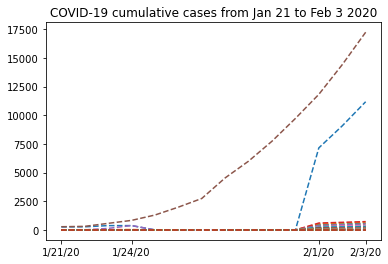

In [6]:
import matplotlib.pyplot as plt

selected_dates = [0, 3, 11, 13]
plt.plot(dates, nbcases.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020")

In [7]:
totals_row = 35
locations = np.delete(locations, (totals_row), axis=0)
nbcases = np.delete(nbcases, (totals_row), axis=0)

china_total = nbcases[locations[:, 1] == "China"].sum(axis=0)
china_total

array([  247,   288,   556,   817,   -22,   -22,   -15,   -10,    -9,
          -7,    -4, 11820, 14410, 17237])

In [8]:
nbcases

array([[  258,   270,   375, ...,  7153,  9074, 11177],
       [   14,    17,    26, ...,   520,   604,   683],
       [   -1,     1,     1, ...,   422,   493,   566],
       ...,
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1],
       [   -1,    -1,    -1, ...,    -1,    -1,    -1]])

In [9]:
from numpy import ma

nbcases_ma = ma.masked_values(nbcases, -1)

In [11]:
nbcases_ma

masked_array(
  data=[[258, 270, 375, ..., 7153, 9074, 11177],
        [14, 17, 26, ..., 520, 604, 683],
        [--, 1, 1, ..., 422, 493, 566],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [ True, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-1)

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020')

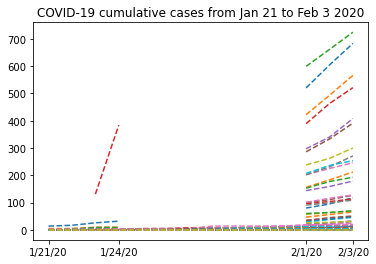

In [12]:
plt.plot(dates, nbcases_ma[1:].T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020")

In [13]:
china_masked = nbcases_ma[locations[:, 1] == "China"].sum(axis=0)
china_masked

masked_array(data=[278, 309, 574, 835, 10, 10, 17, 22, 23, 25, 28, 11821,
                   14411, 17238],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False],
       fill_value=999999)

In [14]:
china_total = china_masked.data
china_total

array([  278,   309,   574,   835,    10,    10,    17,    22,    23,
          25,    28, 11821, 14411, 17238])

In [15]:
china_mask = (
    (locations[:, 1] == "China")
    & (locations[:, 0] != "Hong Kong")
    & (locations[:, 0] != "Taiwan")
    & (locations[:, 0] != "Macau")
    & (locations[:, 0] != "Unspecified*")
)

In [16]:
china_mask.nonzero()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 33],
       dtype=int64),)

In [17]:
china_total = nbcases_ma[china_mask].sum(axis=0)
china_total

masked_array(data=[278, 308, 440, 446, --, --, --, --, --, --, --, 11791,
                   14380, 17205],
             mask=[False, False, False, False,  True,  True,  True,  True,
                    True,  True,  True, False, False, False],
       fill_value=999999)

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China')

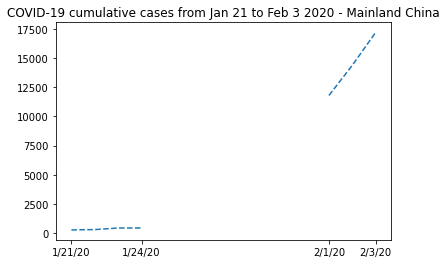

In [18]:
plt.plot(dates, china_total.T, "--")
plt.xticks(selected_dates, dates[selected_dates])
plt.title("COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China")

In [19]:
china_total.mask
invalid = china_total[china_total.mask]
invalid

masked_array(data=[--, --, --, --, --, --, --],
             mask=[ True,  True,  True,  True,  True,  True,  True],
       fill_value=999999,
            dtype=int32)

In [20]:
valid = china_total[~china_total.mask]
valid

masked_array(data=[278, 308, 440, 446, 11791, 14380, 17205],
             mask=[False, False, False, False, False, False, False],
       fill_value=999999)

In [21]:
dates[~china_total.mask]

array(['1/21/20', '1/22/20', '1/23/20', '1/24/20', '2/1/20', '2/2/20',
       '2/3/20'], dtype='<U7')

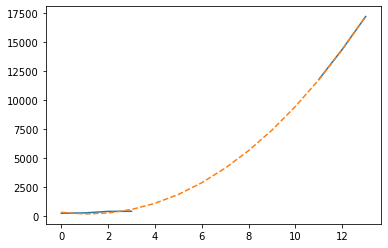

In [22]:
t = np.arange(len(china_total))
params = np.polyfit(t[~china_total.mask], valid, 3)
cubic_fit = np.polyval(params, t)
plt.plot(t, china_total)
plt.plot(t, cubic_fit, "--")

Text(0.5, 1.0, 'COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\nCubic estimate for 7 days after start')

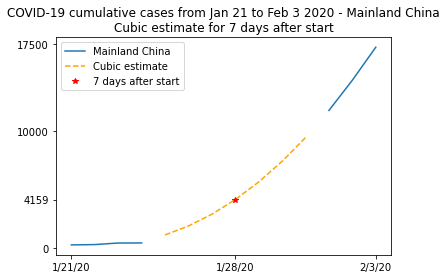

In [23]:
plt.plot(t, china_total)
plt.plot(t[china_total.mask], cubic_fit[china_total.mask], "--", color="orange")
plt.plot(7, np.polyval(params, 7), "r*")
plt.xticks([0, 7, 13], dates[[0, 7, 13]])
plt.yticks([0, np.polyval(params, 7), 10000, 17500])
plt.legend(["Mainland China", "Cubic estimate", "7 days after start"])
plt.title(
    "COVID-19 cumulative cases from Jan 21 to Feb 3 2020 - Mainland China\n"
    "Cubic estimate for 7 days after start"
)